# 2.1

## a)

$$
\begin{equation*}
f^{\prime}(x) \approx \frac{f(x+\Delta x)-f(x)}{\Delta x} \tag{2.2}
\end{equation*}
$$

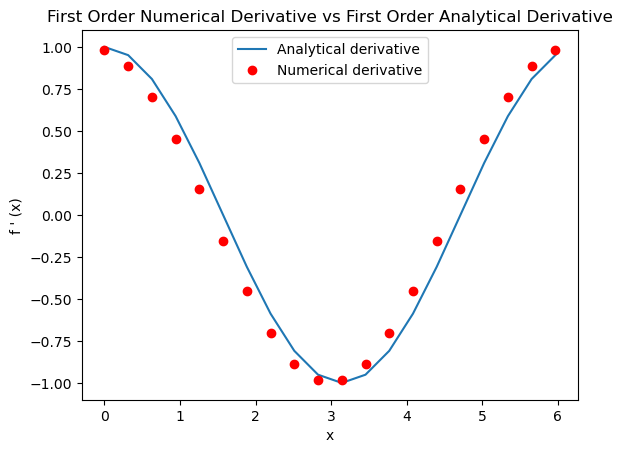

In [456]:
import numpy as np
import matplotlib.pyplot as plt
N = 20
x = np.linspace(0, 2 * np.pi, N, endpoint=False)
dx = 2 * np.pi / N

# Numerical derivative using the given formula
fx = np.sin(x)
f_prime_numerical = (np.roll(fx, -1) - fx) / dx
f_prime_analytical = np.cos(x)


# Plotting
plt.plot(x, f_prime_analytical, label='Analytical derivative')
plt.plot(x, f_prime_numerical, 'ro', label='Numerical derivative')
plt.title('First Order Numerical Derivative vs First Order Analytical Derivative')
plt.xlabel('x')
plt.ylabel("f ' (x)")
plt.legend()
plt.show()

## b)

$$
\begin{array}{|c|c|c|c|c|c|c|c|} 
& -3 \Delta x & -2 \Delta x & -\Delta x & 0 & \Delta x & 2 \Delta x & 3 \Delta x \\
O(\Delta x) & 0 & 0 & 0 & -1 & 1 & 0 & 0 \\
O\left(\Delta x^{2}\right) & 0 & 0 & -\frac{1}{2} & 0 & \frac{1}{2} & 0 & 0 \\
O\left(\Delta x^{4}\right) & 0 & \frac{1}{12} & -\frac{2}{3} & 0 & \frac{2}{3} & -\frac{1}{12} & 0 \\
O\left(\Delta x^{6}\right) & -\frac{1}{60} & \frac{3}{20} & -\frac{3}{4} & 0 & \frac{3}{4} & -\frac{3}{20} & \frac{1}{60}
\end{array}
$$

f(x - Δx) - f(x + Δx)/2Δx

−f(x+2Δx)+8f(x+Δx)−8f(x−Δx)+f(x−2Δx)/12Δx

f(x−3Δx)−9f(x−2Δx)+45f(x−Δx)−45f(x+Δx)+9f(x+2Δx)−f(x+3Δx)​/60Δx

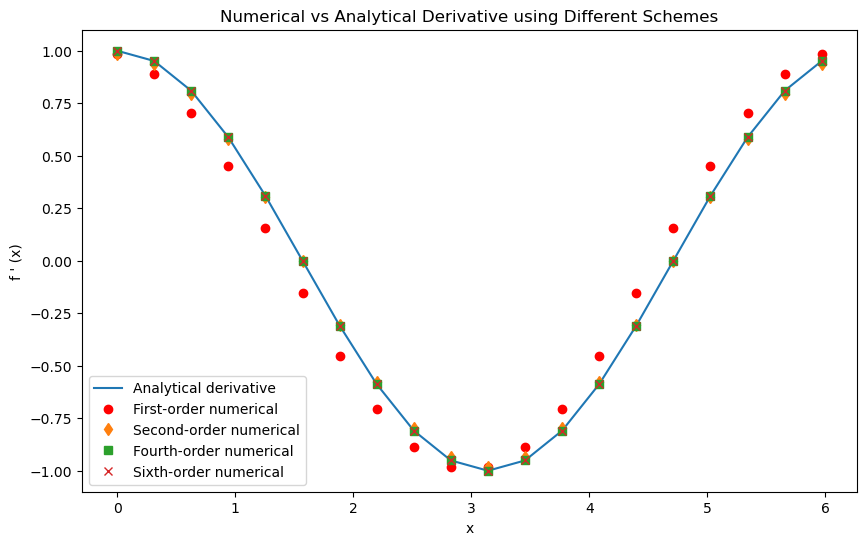

In [457]:
def second_order(fx, dx):
    return (np.roll(fx, -1) - np.roll(fx, 1)) / (2 * dx)

def fourth_order(fx, dx):
    return (np.roll(fx, 2) - np.roll(fx, -2) + 8 * np.roll(fx, -1) - 8 * np.roll(fx, 1) ) / (12 * dx)

def sixth_order(fx, dx):
    return (np.roll(fx, -3) - np.roll(fx, 3) + 
            9 * np.roll(fx, 2) - 9 * np.roll(fx, -2) + 
            45 * np.roll(fx, -1) - 45 * np.roll(fx, 1)) / (60 * dx)

f_prime_second_order = second_order(fx, dx)
f_prime_fourth_order = fourth_order(fx, dx)
f_prime_sixth_order = sixth_order(fx, dx)

# Plot the results
# set figure size
plt.figure(figsize=(10, 6)) # otherwise legend is blocking the plot
plt.plot(x, f_prime_analytical, label='Analytical derivative')
plt.plot(x, f_prime_numerical, 'ro', label='First-order numerical')
plt.plot(x, f_prime_second_order, 'd', label='Second-order numerical')
plt.plot(x, f_prime_fourth_order, 's', label='Fourth-order numerical')
plt.plot(x, f_prime_sixth_order, 'x', label='Sixth-order numerical')
plt.xlabel('x')
plt.ylabel("f ' (x)")
plt.legend()
plt.title('Numerical vs Analytical Derivative using Different Schemes')
plt.show()



## c)

In [458]:
max_error_first_order = np.max(np.abs(f_prime_numerical - f_prime_analytical))
max_error_second_order = np.max(np.abs(f_prime_second_order - f_prime_analytical))
max_error_fourth_order = np.max(np.abs(f_prime_fourth_order - f_prime_analytical))
max_error_sixth_order = np.max(np.abs(f_prime_sixth_order - f_prime_analytical))

print(f"Max error first-order: {max_error_first_order}")
print(f"Max error second-order: {max_error_second_order}")
print(f"Max error fourth-order: {max_error_fourth_order}")
print(f"Max error sixth-order: {max_error_sixth_order}")


Max error first-order: 0.15579194727527879
Max error second-order: 0.016368356916534044
Max error fourth-order: 0.0003209038182584445
Max error sixth-order: 6.736514570726548e-06


## d)

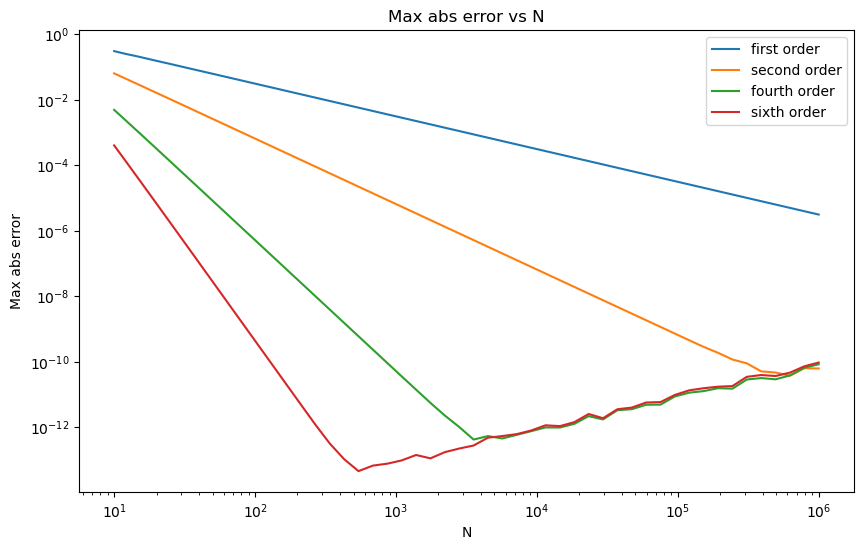

In [459]:
N = np.logspace(1, 6, 50, dtype=int)
errors_first_order = []
errors_second_order = []
errors_fourth_order = []
errors_sixth_order = []

for n in N:
    x = np.linspace(0, 2 * np.pi, n, endpoint=False)
    dx = 2 * np.pi / n
    fx = np.sin(x)
    f_prime_analytical = np.cos(x)
    f_prime_numerical = (np.roll(fx, -1) - fx) / dx

    f_prime_second_order = second_order(fx, dx)
    f_prime_fourth_order = fourth_order(fx, dx)
    f_prime_sixth_order = sixth_order(fx, dx)
    max_error_first_order = np.max(np.abs(f_prime_numerical - f_prime_analytical))
    max_error_second_order = np.max(np.abs(f_prime_second_order - f_prime_analytical))
    max_error_fourth_order = np.max(np.abs(f_prime_fourth_order - f_prime_analytical))
    max_error_sixth_order = np.max(np.abs(f_prime_sixth_order - f_prime_analytical))
    errors_first_order += [max_error_first_order]
    errors_second_order += [max_error_second_order]
    errors_fourth_order += [max_error_fourth_order]
    errors_sixth_order += [max_error_sixth_order]

plt.figure(figsize=(10, 6))
plt.loglog(N, errors_first_order, label = 'first order')
plt.loglog(N, errors_second_order, label = 'second order')
plt.loglog(N, errors_fourth_order, label = 'fourth order')
plt.loglog(N, errors_sixth_order, label = 'sixth order')
plt.xlabel('N')
plt.ylabel('Max abs error')
plt.title('Max abs error vs N')
plt.legend()
plt.show()    

## e)

## f)

## g)

# 2.3
Consider the following function
$$
f(x)= \begin{cases}e^{-x}+a x-1 & x<0  \tag{2.4}\\ x^{2} & x>0\end{cases}
$$
which has the derivative
$$
f^{\prime}(x)= \begin{cases}-e^{-x}+a & x<0  \tag{2.5}\\ 2 x & x>0\end{cases}
$$

## a)

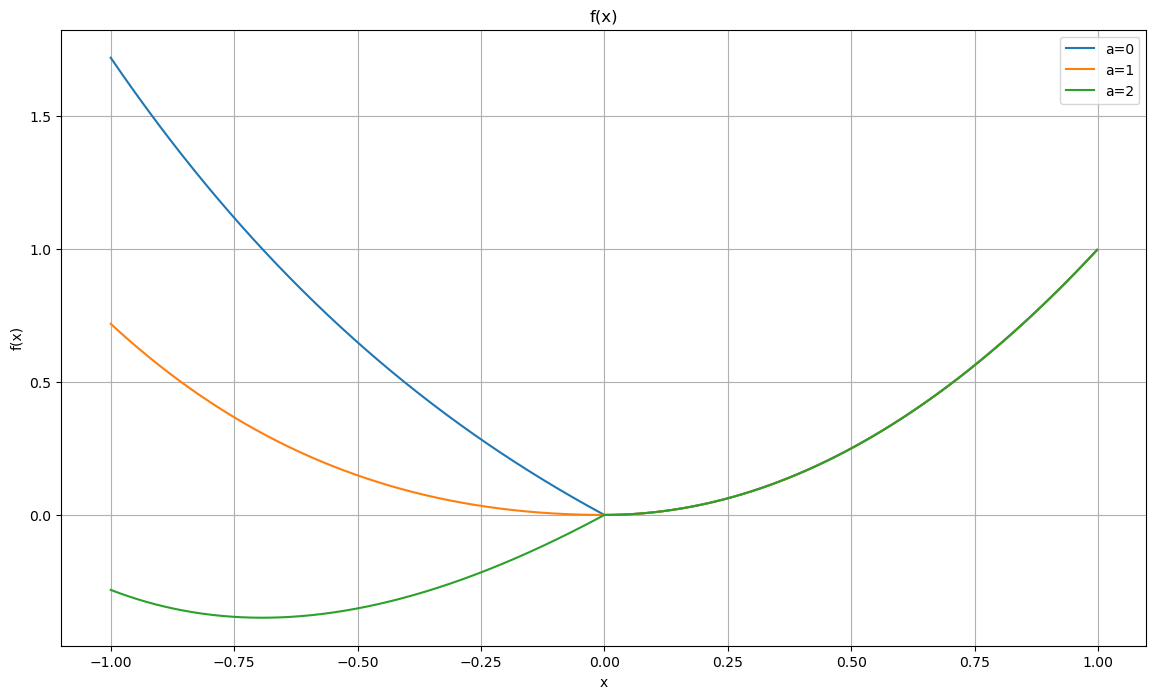

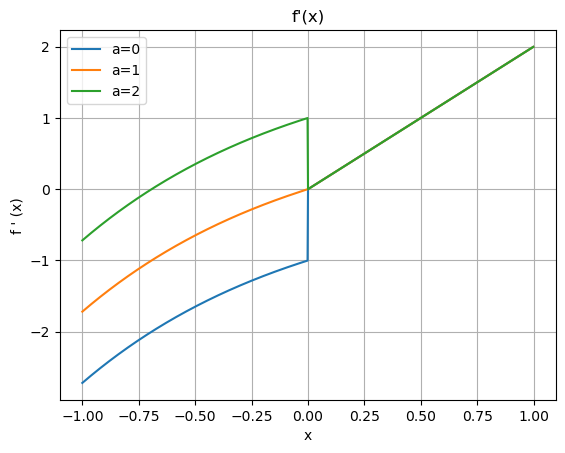

In [460]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
x = np.linspace(-1, 1, N, endpoint=False)

# Define the function and its analytical derivative using np.piecewise
def f(x, a):
    return np.piecewise(x, [x < 0, x > 0], [lambda x: np.exp(-x) + a * x - 1, lambda x: x**2])

def f_prime(x, a):
    return np.piecewise(x, [x < 0, x > 0], [lambda x: -np.exp(-x) + a, lambda x: 2 * x])

a_values = [0, 1, 2]

# plotting f(x) for different values of a
plt.figure(figsize=(14, 8))
for a in a_values:
    # Define the function and its derivative using np.piecewise
    f_values = f(x, a)
    plt.plot(x, f_values, label=f'a={a}')
    plt.title('f(x)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
plt.show()

# plotting f'(x) for different values of a
for a in a_values:
    f_prime_values = f_prime(x, a)
    plt.plot(x, f_prime_values, label=f'a={a}')
    plt.title("f'(x)")
    plt.xlabel('x')
    plt.ylabel("f ' (x)")
    plt.grid(True)
    plt.legend()
plt.show()

## b)

## c)

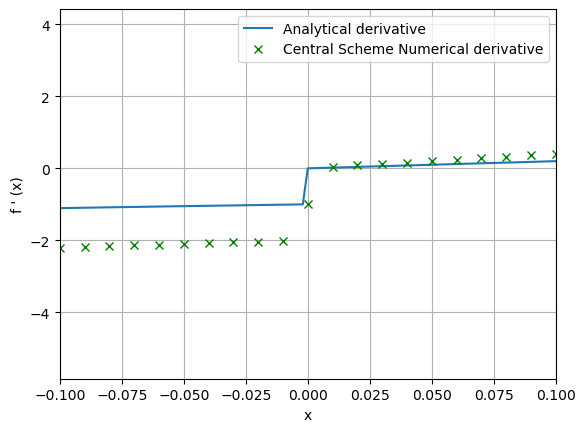

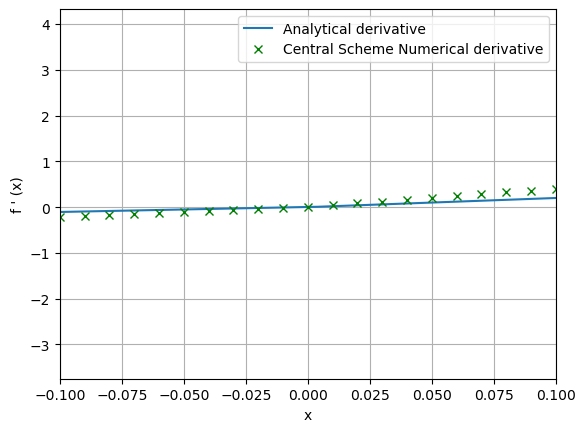

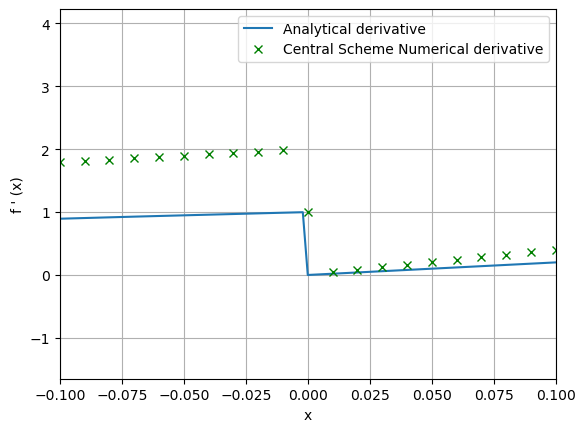

In [461]:
dx = x[1] - x[0]

# making the central second order finite difference scheme
A = np.zeros((N, N))
# forward difference
A[0, 0] = -3 / 2
A[0, 1] = 2
A[0, 2] = -1 / 2

# central difference, shifting -1 and 1 to the right for each row
for i in range(1, N - 1):
    A[i, i - 1] = -1
    A[i, i + 1] = 1

# backward difference
A[N - 1, N - 3] = 1 / 2
A[N - 1, N - 2] = -2
A[N - 1, N - 1] = 3 / 2

for a in a_values:
    f_prime_analytical = f_prime(x, a)
    f_prime_central_scheme = A @ f(x, a) / dx

    plt.plot(x, f_prime_analytical, label='Analytical derivative')
    plt.plot(x[::5], f_prime_central_scheme[::5],'gx', label='Central Scheme Numerical derivative')  
    plt.xlabel('x')
    plt.ylabel("f ' (x)")
    plt.legend()
    plt.grid(True)
    plt.xlim(-0.1, 0.1)  # Zoom in near x=0
    plt.show()


## d)

[[ 0.  0.  0. ...  0.  0.  0.]
 [-1.  1.  0. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  1.  0.]
 [ 0.  0.  0. ...  0. -1.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]]
Max error for a=0: 2.718281828459045


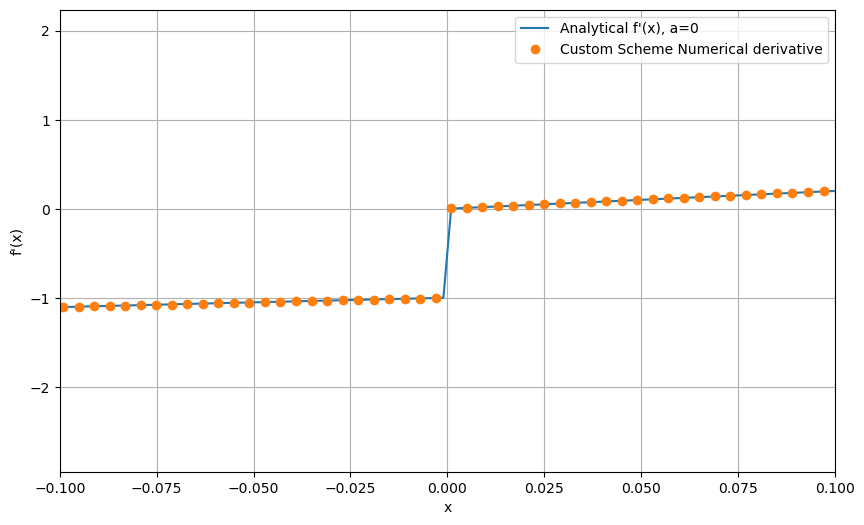

Max error for a=1: 2.0


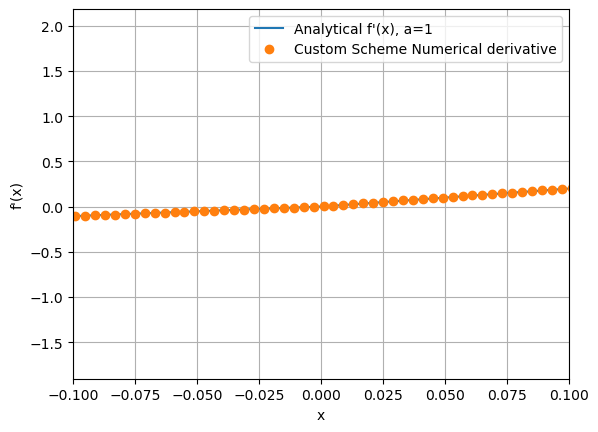

Max error for a=2: 2.0


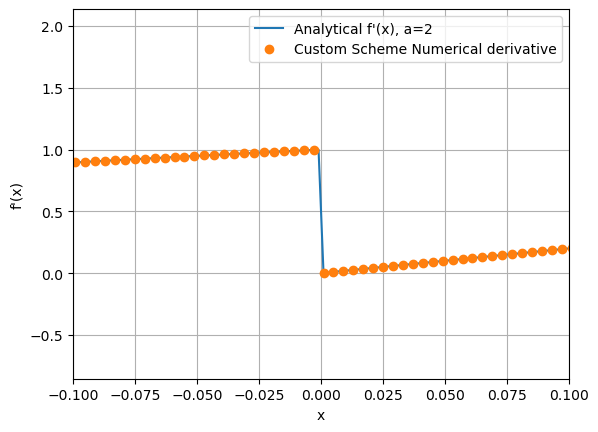

In [462]:
import numpy as np
import matplotlib.pyplot as plt
A2 = np.zeros((N, N))

# Backward difference for x < 0
for i in range(1, N//2): # from start to middle
    A2[i, i] = 1 # diagonal
    A2[i, i-1] = -1 # subdiagonal

# Forward difference for x > 0
for i in range(N//2, N-1): # from middle to end
    A2[i, i+1] = 1 # 
    A2[i, i] = -1

print(A2)
# Set up the x values and parameter a
x = np.linspace(-1, 1, 1000)
a_values = [0, 1, 2]

plt.figure(figsize=(10, 6))

for a in a_values:
    f_prime_custom_scheme = A2 @ f(x, a) / dx
    analytical_derivative = f_prime(x, a)
    max_error = np.max(np.abs(f_prime_custom_scheme-analytical_derivative))
    print(f"Max error for a={a}: {max_error}")
    plt.plot(x, analytical_derivative, label=f'Analytical f\'(x), a={a}')
    plt.plot(x[::2], f_prime_custom_scheme[::2],'o', label='Custom Scheme Numerical derivative')
    plt.xlabel("x")
    plt.ylabel("f'(x)")
    plt.legend()
    plt.xlim([-0.1, 0.1])  # Zoom in near x=0
    plt.grid(True)
    plt.show()
    


## e)

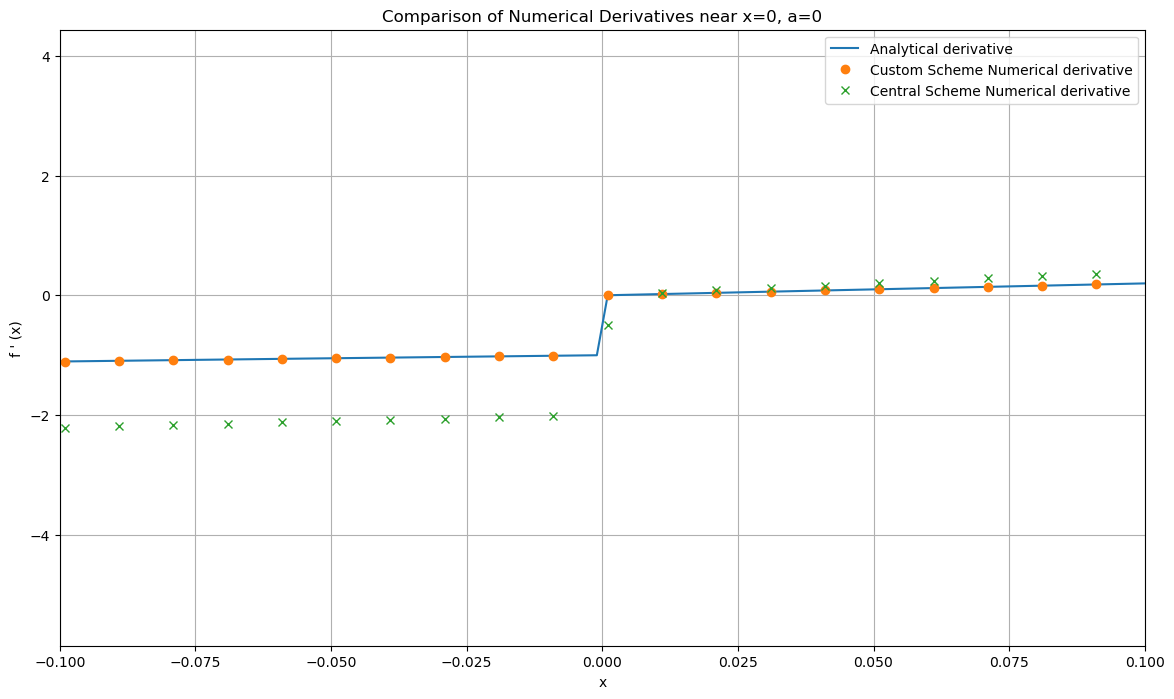

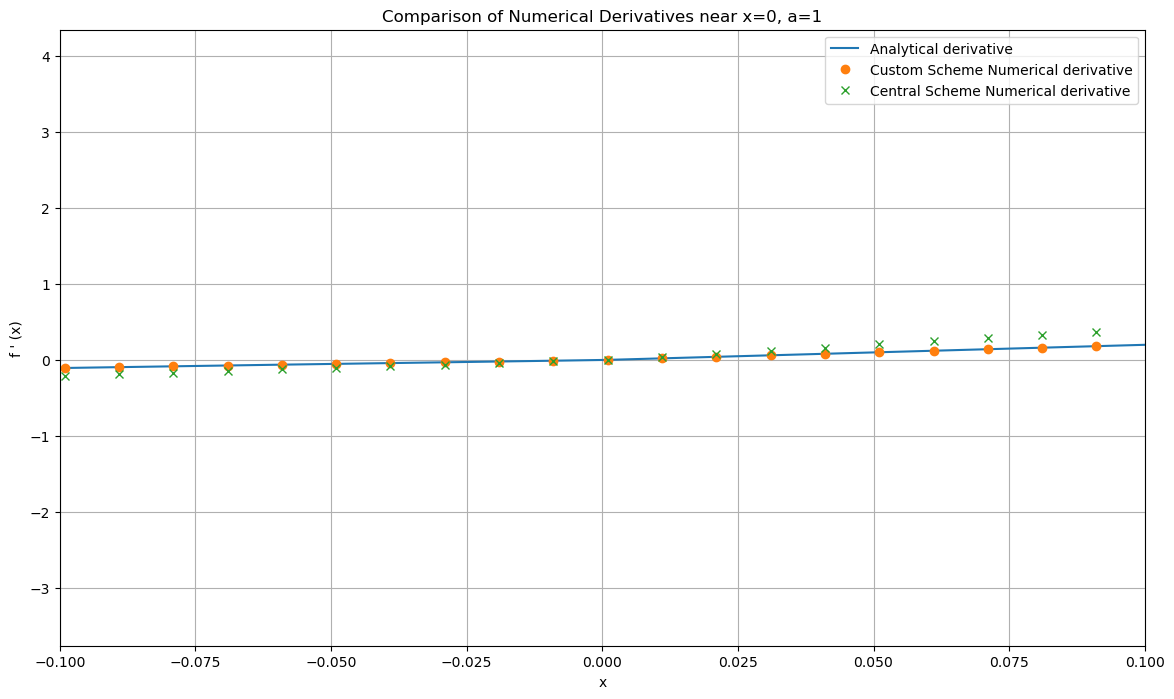

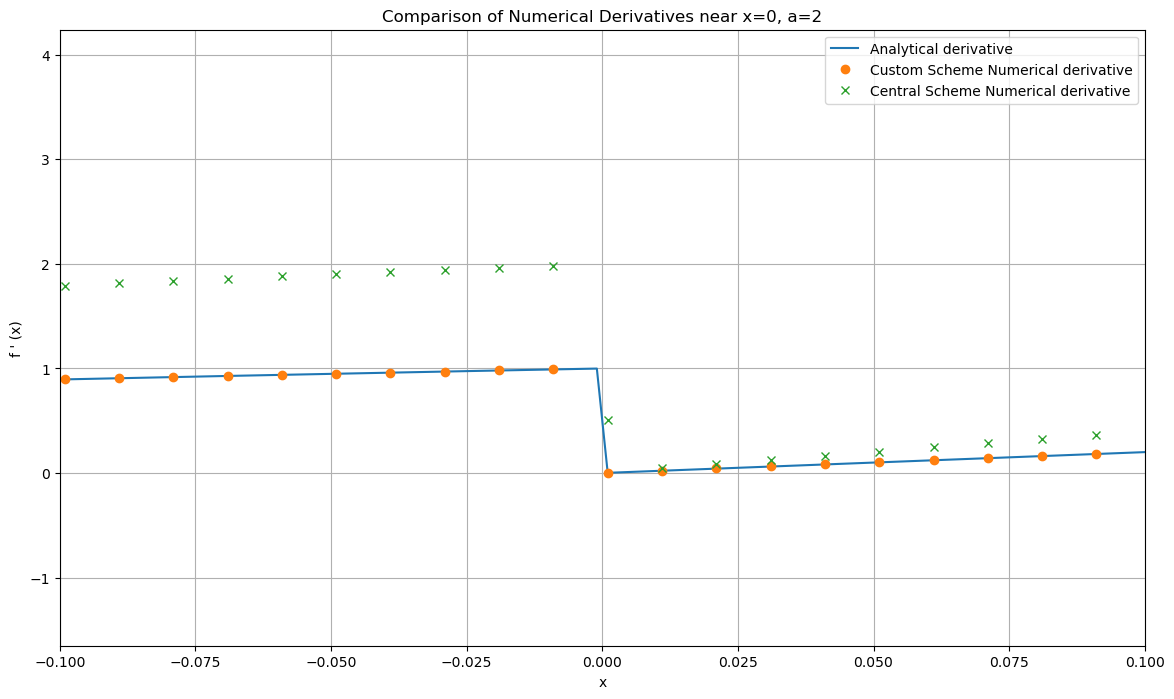

In [463]:
# First derivative calculation using the central difference scheme
for a in a_values: 
    f_prime_central = A @ f(x, a) / dx
    f_prime_numerical = A2 @ f(x, a) / dx
    analytical_derivative = f_prime(x, a)

    # Plotting the results near x = 0 for comparison
    plt.figure(figsize=(14, 8))
    plt.plot(x, analytical_derivative, label='Analytical derivative')
    plt.plot(x[::5], f_prime_numerical[::5],'o', label='Custom Scheme Numerical derivative')
    plt.plot(x[::5], f_prime_central[::5],'x', label='Central Scheme Numerical derivative')
    plt.title(f"Comparison of Numerical Derivatives near x=0, a={a}")
    plt.xlabel('x')
    plt.ylabel("f ' (x)")
    plt.xlim(-0.1, 0.1)  # Zoom in near x=0
    plt.legend()
    plt.grid(True)
    plt.show()


# 3.1

Consider the ODE
$$
\begin{equation*}
\frac{\mathrm{d} x}{\mathrm{~d} t}=\alpha(\sin t-x) \tag{3.1}
\end{equation*}
$$

For $x(0)=0$, this has the analytical solution
$$
\begin{equation*}
x(t)=\frac{\alpha}{1+\alpha^{2}}\left(e^{-\alpha t}-\cos t+\alpha \sin t\right) \tag{3.2}
\end{equation*}
$$

## a)

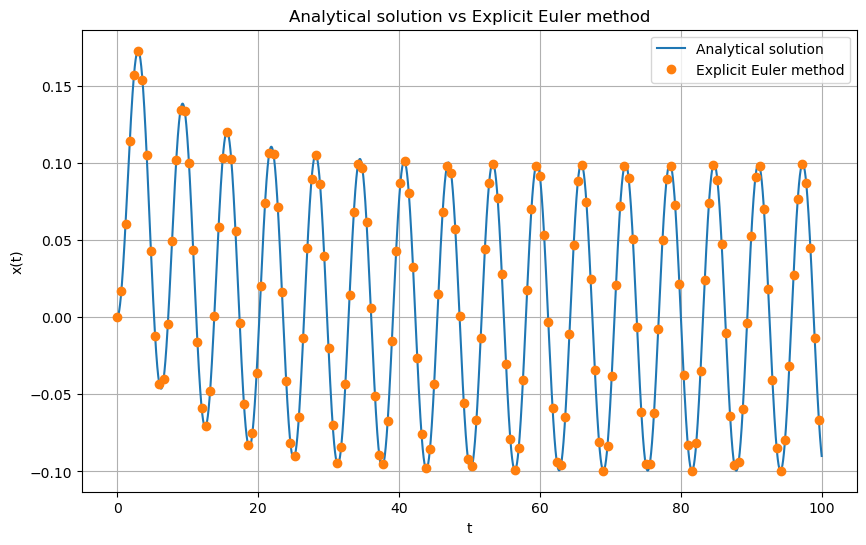

In [464]:
alpha = 0.1
dt = 0.01
t0 = 0
tn = 100
t = np.arange(t0, tn, dt)
x = np.zeros_like(t)

analytical_euler = lambda alpha, t: alpha/(1+alpha**2)*(np.exp(-alpha*t)-np.cos(t)+alpha*np.sin(t))

def explicit_euler(t,x):
    for i in range(1, len(t)):
        x[i] = x[i-1] + dt * alpha * (np.sin(t[i-1]) - x[i-1])
    return x


# plot the analytical solution with the explicit Euler method
plt.figure(figsize=(10, 6))
plt.plot(t, analytical_euler(alpha, t), label='Analytical solution')
plt.plot(t[::60], explicit_euler(t, x)[::60], "o", label='Explicit Euler method')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend()
plt.title('Analytical solution vs Explicit Euler method')
plt.show()


## b)

Max error explicit Euler: 0.0005430522532383492
Max error implicit Euler: 0.0005435657530602905
Max erros are not the same: True


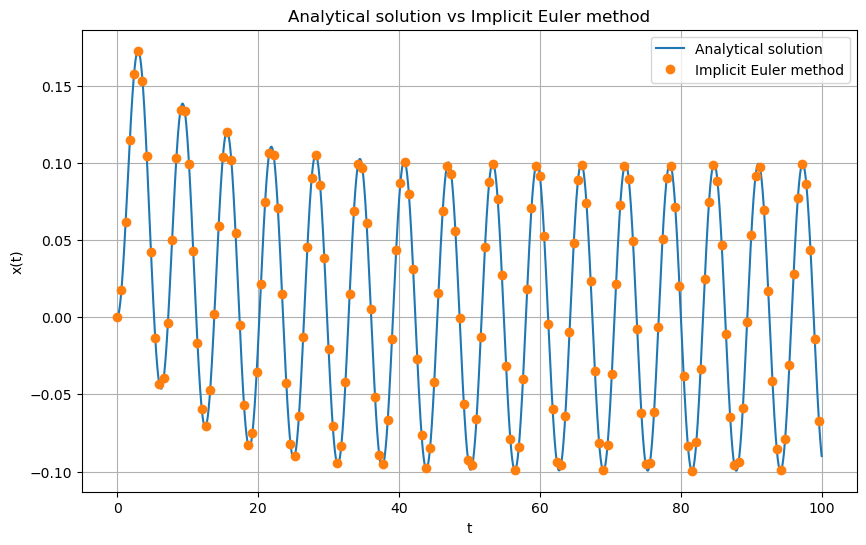

In [465]:
def implicit_euler(t, x):
    for i in range(1, len(t)):
        x[i] = (x[i-1] + dt * alpha * np.sin(t[i])) / (1 + dt * alpha)
    return x

# max errors to show that there is a difference between the two methods
# np.equal didn't work, propably because of floating point errors
max_error_explicit_euler = np.max(np.abs(analytical_euler(alpha, t) - explicit_euler(t, x)))
max_error_implicit_euler = np.max(np.abs(analytical_euler(alpha, t) - implicit_euler(t, x)))
print(f"Max error explicit Euler: {max_error_explicit_euler}")
print(f"Max error implicit Euler: {max_error_implicit_euler}")
print(f"Max erros are not the same: {max_error_explicit_euler != max_error_implicit_euler}")

plt.figure(figsize=(10, 6))
plt.plot(t, analytical_euler(alpha, t), label='Analytical solution')
plt.plot(t[::60], implicit_euler(t, x)[::60], "o", label='Implicit Euler method')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend()
plt.title('Analytical solution vs Implicit Euler method')
plt.show()

## c)

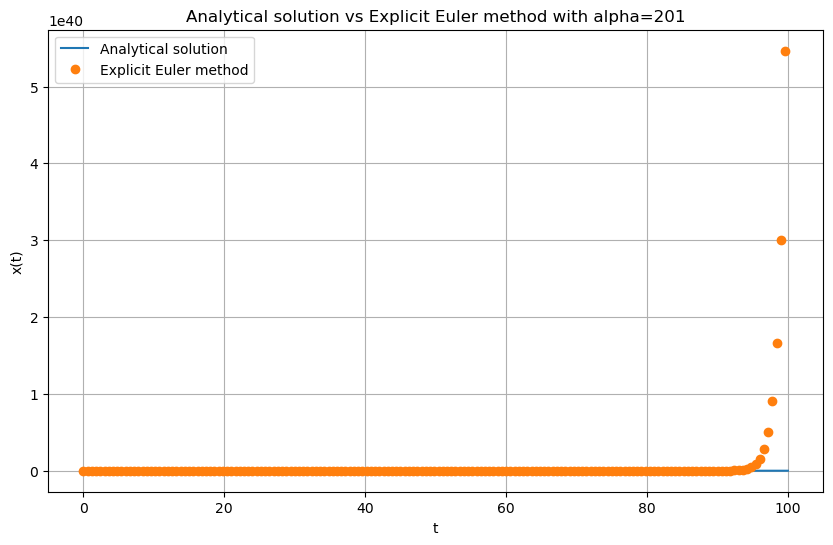

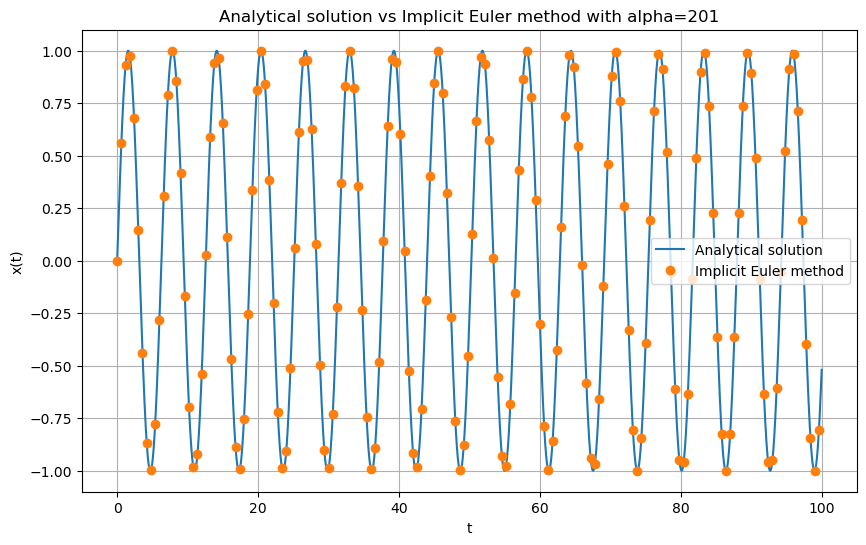

In [466]:
alpha = 201

plt.figure(figsize=(10, 6))
plt.plot(t, analytical_euler(alpha, t), label='Analytical solution')
plt.plot(t[::60], explicit_euler(t, x)[::60], "o", label='Explicit Euler method')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend()
plt.title('Analytical solution vs Explicit Euler method with alpha=201')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, analytical_euler(alpha, t), label='Analytical solution')
plt.plot(t[::60], implicit_euler(t, x)[::60], "o", label='Implicit Euler method')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend()
plt.title('Analytical solution vs Implicit Euler method with alpha=201')
plt.show()

# 3.3
Runge-Kutta method
$$
\begin{align*}
& k_{1}=F(f(t), t) \\
& k_{2}=F\left(f(t)+\frac{1}{2} k_{1} \Delta t, t+\frac{1}{2} \Delta t\right) \\
& k_{3}=F\left(f(t)+\frac{1}{2} k_{2} \Delta t, t+\frac{1}{2} \Delta t\right)  \tag{3.4}\\
& k_{4}=F\left(f(t)+k_{3} \Delta t, t+\Delta t\right) \\
& f(t+\Delta t)=f(t)+\frac{1}{6}\left[k_{1}+2 k_{2}+2 k_{3}+k_{4}\right] \Delta t
\end{align*}
$$

## a)

## b)

## c)